In [2]:
# analysis of fusion index of Cell Profiler data tubes
import pandas as pd
import seaborn as sns

monoFile = r"E:\Cell Painting Data\CellProfiler\per well profiles\tubesMonoByWellProfiler.csv"
polyFile = r"E:\Cell Painting Data\CellProfiler\per well profiles\tubesPolyByWellProfiler.csv"

monoCells = pd.read_csv(monoFile)
polyCells = pd.read_csv(polyFile)

monoCells = monoCells.iloc[:, [1, 2, 3, 4, -1]]
polyCells = polyCells.iloc[:, [1, 2, 3, 4, -1]]

In [3]:
monoCells = monoCells.rename(columns={"Count": "Mono Count", "Metadata_Concentration (Image)":"Concentration" })
polyCells = polyCells.rename(columns={"Count": "Poly Count", "Metadata_Concentration (Image)":"Concentration"})

monoCells = monoCells.sort_values(["PlateID", "Metadata_Well"])
polyCells = polyCells.sort_values(["PlateID", "Metadata_Well"])


allCells = pd.merge(monoCells, polyCells, on=["Metadata_Well", "PlateID"], how='outer', suffixes=('', '_delme'))
allCells = allCells[[c for c in allCells.columns if not c.endswith('_delme')]]

In [4]:
# compute fusion index
allCells["FusionIndex"] = allCells.apply(lambda row: row["Poly Count"] / (row["Mono Count"] + row["Poly Count"]), axis=1)
allCells["Replicate"] = allCells["PlateID"].str[-1]
allCells

,Metadata_Well,Compound,Concentration,Mono Count,PlateID,Poly Count,FusionIndex,Replicate
0,C10,NCAP,30,223.6,tubes1BR1,162.0,0.420124,1
1,C11,NCAP,100,256.4,tubes1BR1,133.8,0.342901,1
2,C12,NCAP,100,234.4,tubes1BR1,155.6,0.398974,1
3,C13,NCAP,300,268.6,tubes1BR1,126.2,0.319656,1
4,C14,NCAP,300,235.6,tubes1BR1,157.4,0.400509,1
...,...,...,...,...,...,...,...,...
3355,N5,DMSO,0,50.8,tubes5BR3,195.0,0.793328,3
3356,N6,DMSO,0,73.2,tubes5BR3,210.6,0.742072,3
3357,N7,ZIDO,10,61.6,tubes5BR3,192.8,0.757862,3
3358,N8,ZIDO,10,52.0,tubes5BR3,157.0,0.751196,3


c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\anaconda3\envs\bigfile\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Roman\a

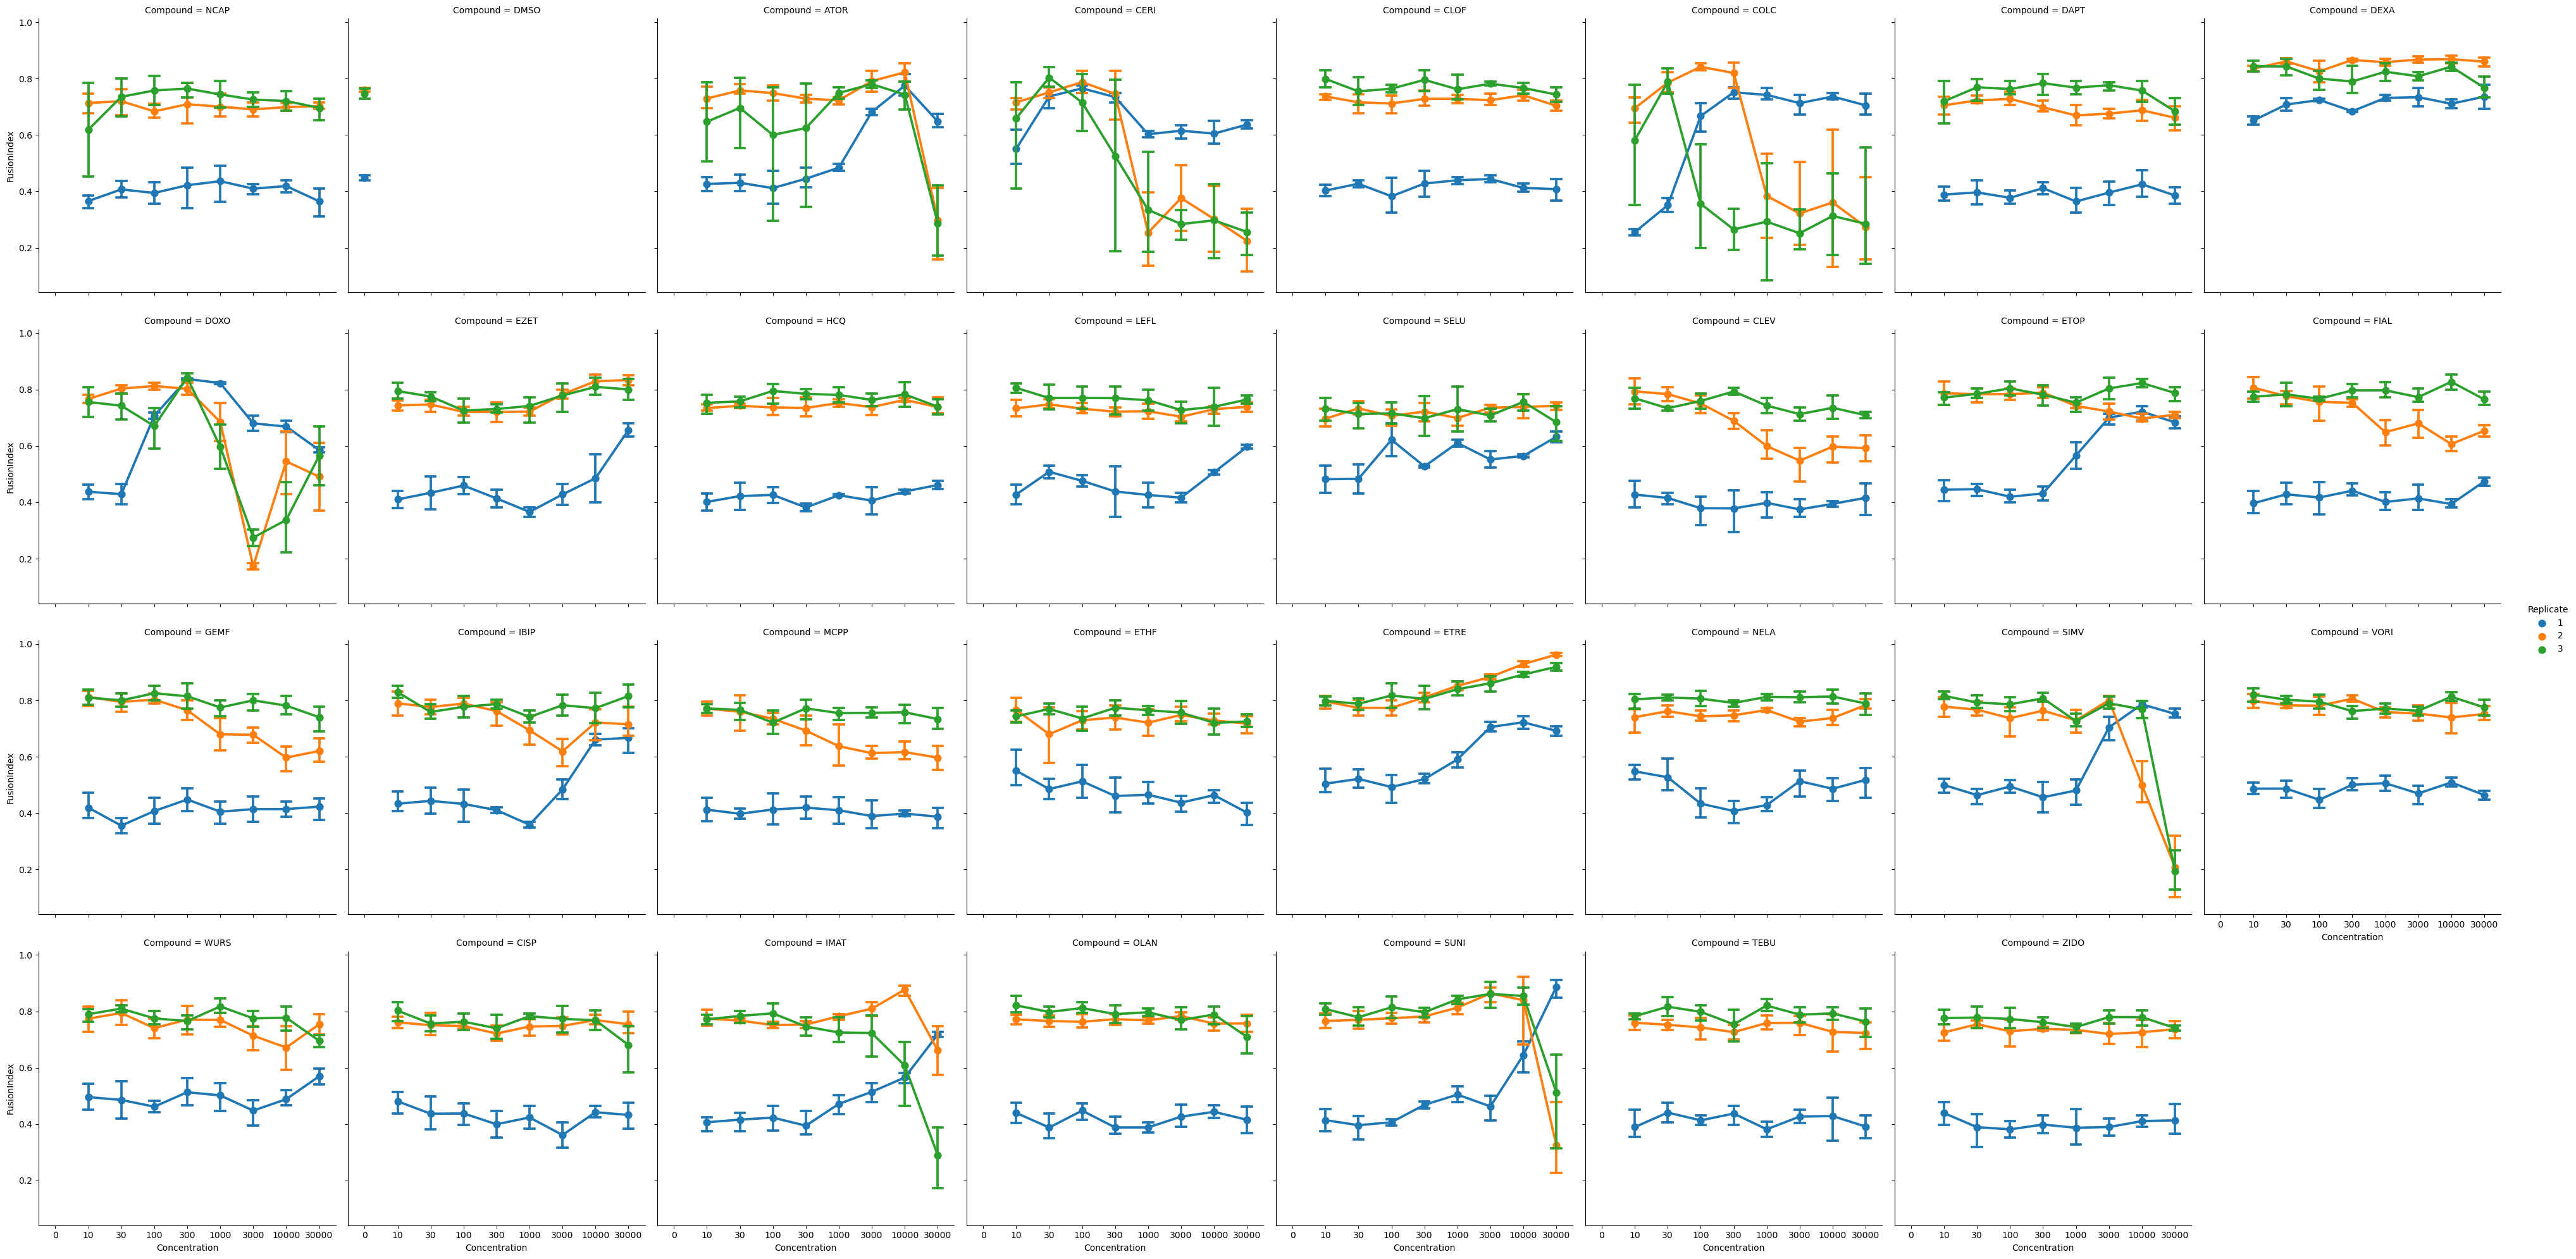

In [5]:
fig = sns.catplot(  data=allCells, 
                    x='Concentration',
                    y='FusionIndex',
                    col='Compound',
                    kind='point',
                    col_wrap=8,
                    color='red',
                    capsize=0.3, 
                    hue='Replicate', 
                    palette='tab10')


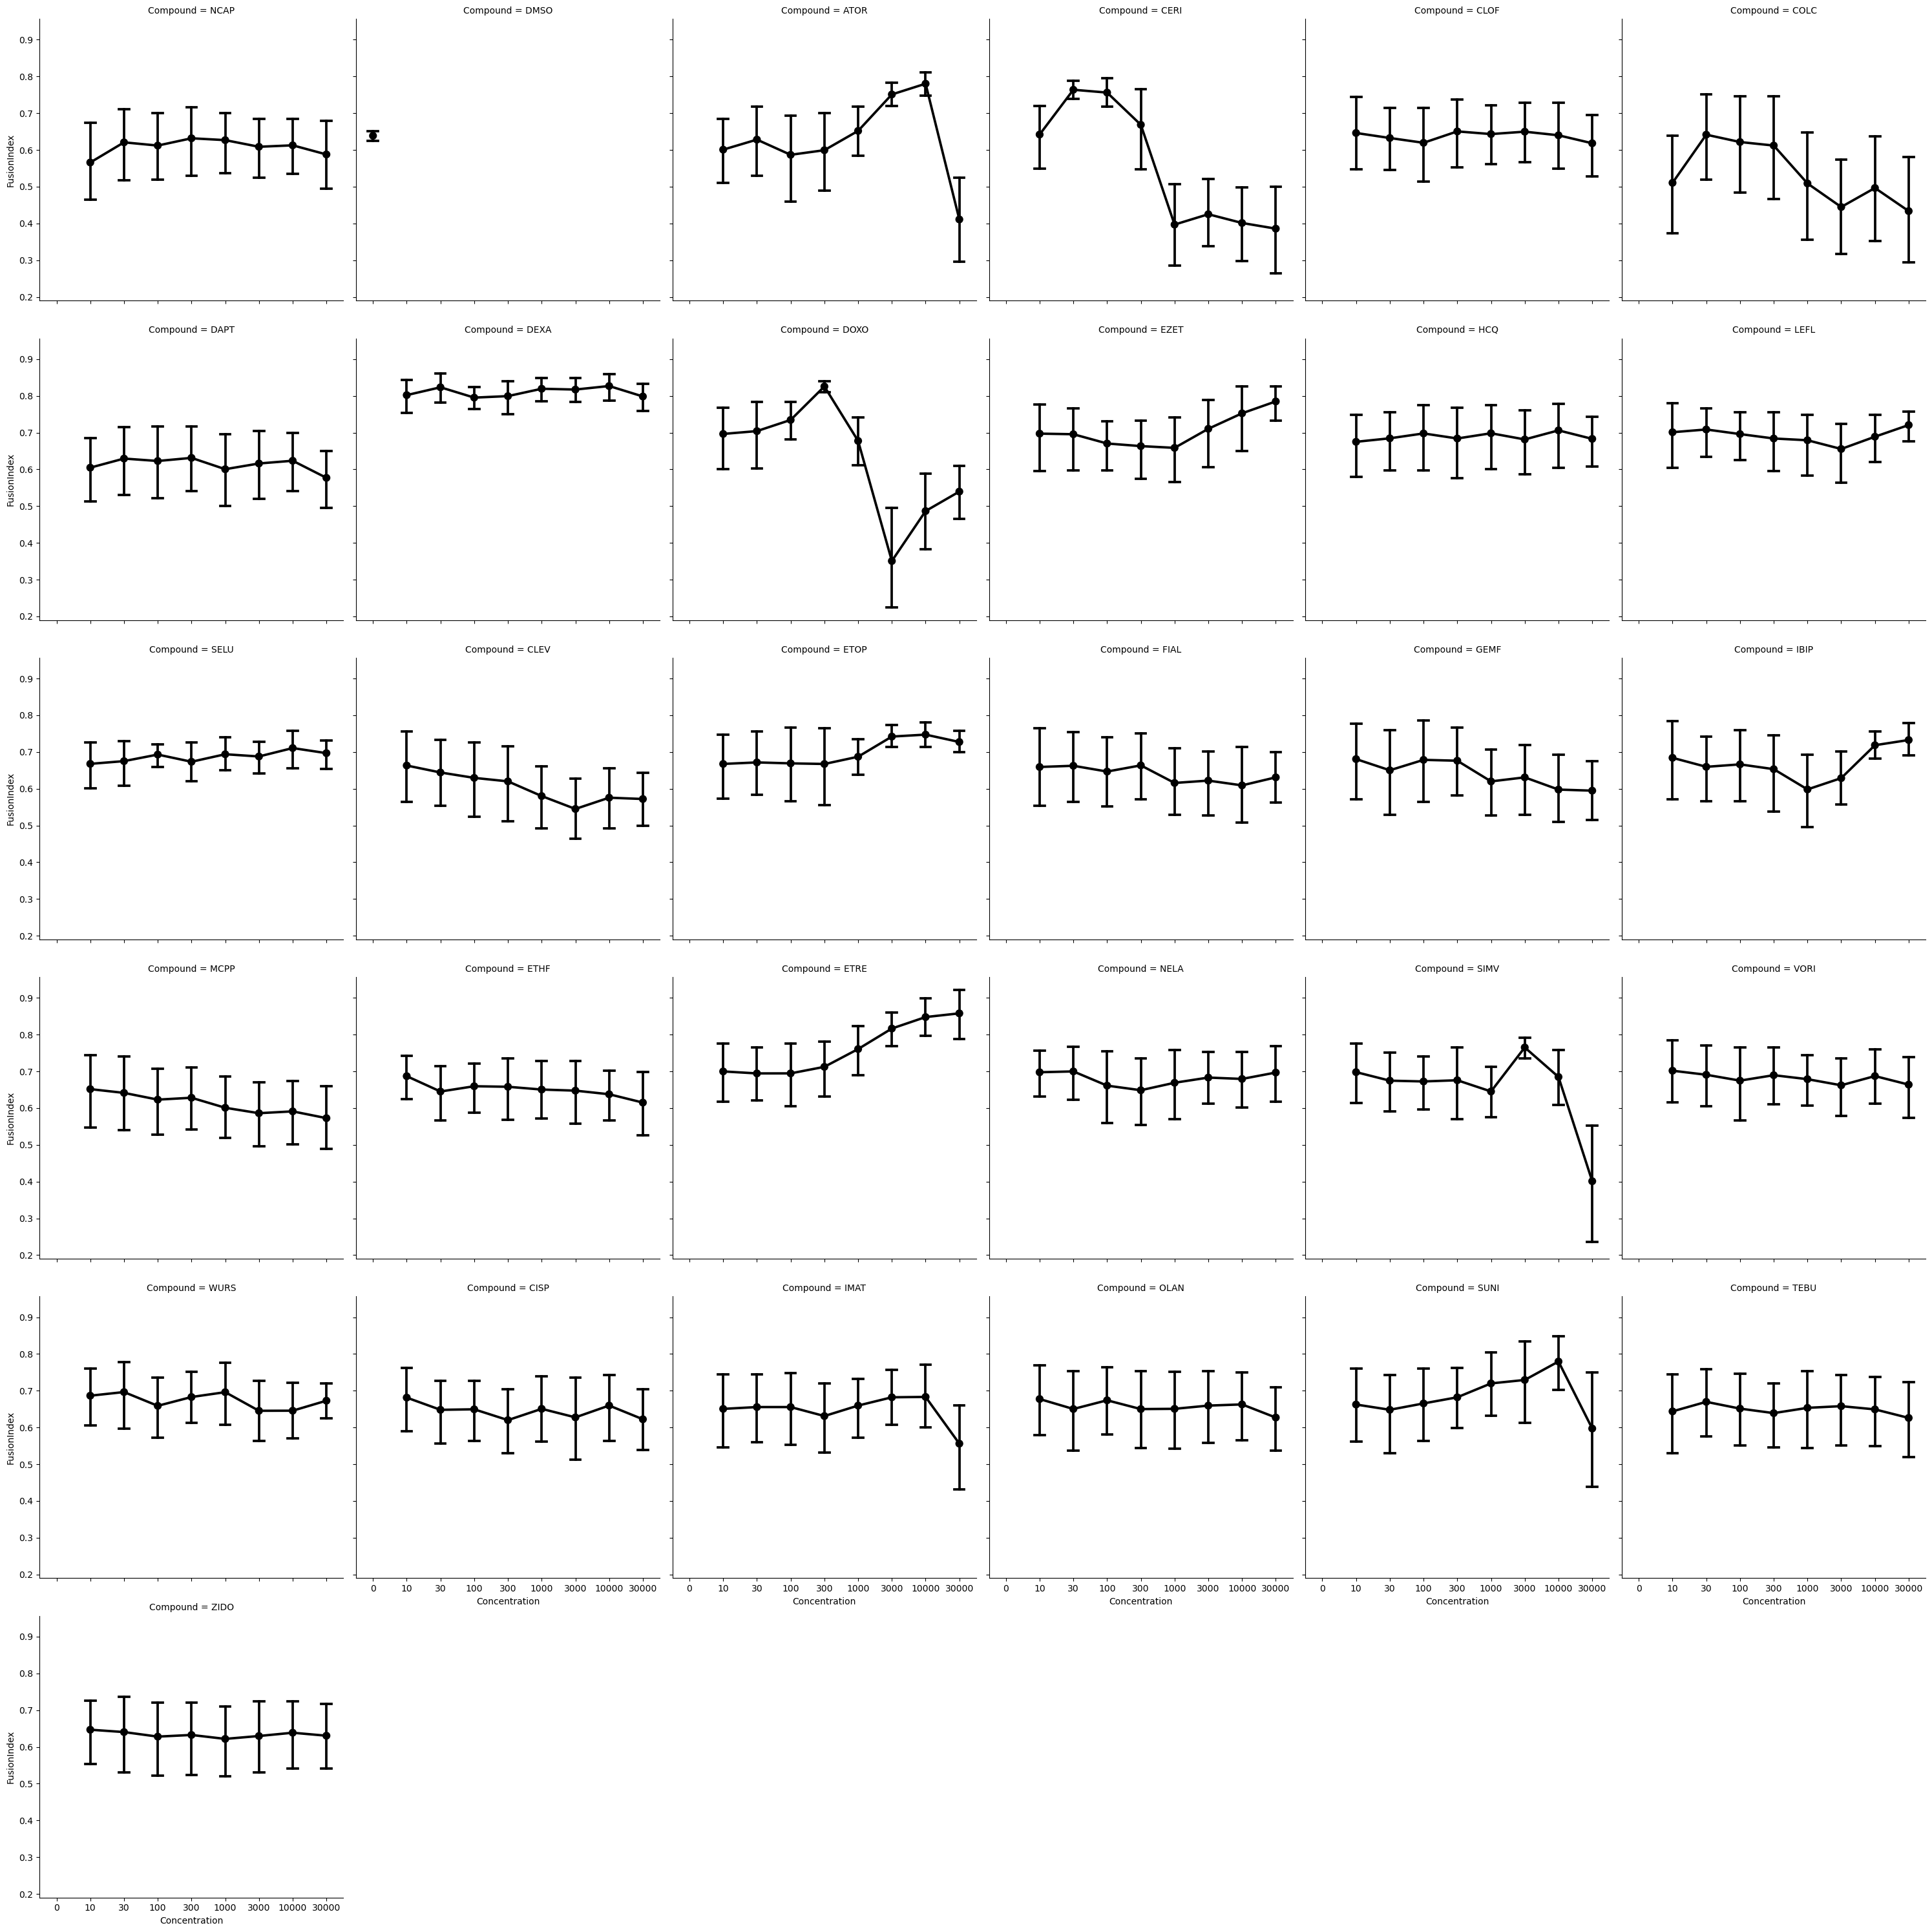

In [6]:
figAvg = sns.catplot(  data=allCells, 
                    x='Concentration',
                    y='FusionIndex',
                    col='Compound',
                    kind='point',
                    col_wrap=6,
                    color='black',
                    capsize=0.3,
                    errorbar='ci',
                    estimator='mean')